In [82]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing data from github 

data = pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


As we can see there is no null values. SO, we are good to go.

In [26]:
# Independent Features:
Feature = list(data.drop(["quality"], axis=1).columns)
for i in Feature:
    print("-> "+i)

-> fixed acidity
-> volatile acidity
-> citric acid
-> residual sugar
-> chlorides
-> free sulfur dioxide
-> total sulfur dioxide
-> density
-> pH
-> sulphates
-> alcohol


In [25]:
# dependent variable:
target = list(data.quality.unique())
print("total number of Categories in target feature:"+str(len(target)))
print("\n\nThe categories are as follows:")
for i in target:
    print("-> "+str(i))

total number of Categories in target feature:6


The categories are as follows:
-> 5
-> 6
-> 7
-> 4
-> 8
-> 3


In [14]:
X = data.drop(["quality"], axis=1)
y = data[["quality"]]

In [15]:
# Now split the training and testing data:

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=333)

In [87]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

[Text(1596.3515528390355, 1587.8842105263157, 'alcohol <= 10.525\ngini = 0.636\nsamples = 1199\nvalue = [5, 36, 513, 487, 145, 13]'),
 Text(1065.7018690746086, 1502.0526315789473, 'total sulfur dioxide <= 98.5\ngini = 0.537\nsamples = 738\nvalue = [3, 22, 432, 254, 26, 1]'),
 Text(691.5521305647156, 1416.221052631579, 'sulphates <= 0.555\ngini = 0.558\nsamples = 649\nvalue = [3, 21, 352, 247, 25, 1]'),
 Text(229.72073371805442, 1330.3894736842105, 'alcohol <= 9.533\ngini = 0.443\nsamples = 201\nvalue = [2, 11, 143, 44, 1, 0]'),
 Text(57.50206100577082, 1244.5578947368422, 'volatile acidity <= 0.275\ngini = 0.316\nsamples = 97\nvalue = [0, 5, 79, 13, 0, 0]'),
 Text(18.400659521846663, 1158.7263157894736, 'residual sugar <= 2.0\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 0, 1, 0, 0]'),
 Text(9.200329760923331, 1072.8947368421054, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0]'),
 Text(27.600989282769994, 1072.8947368421054, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]'),
 Text

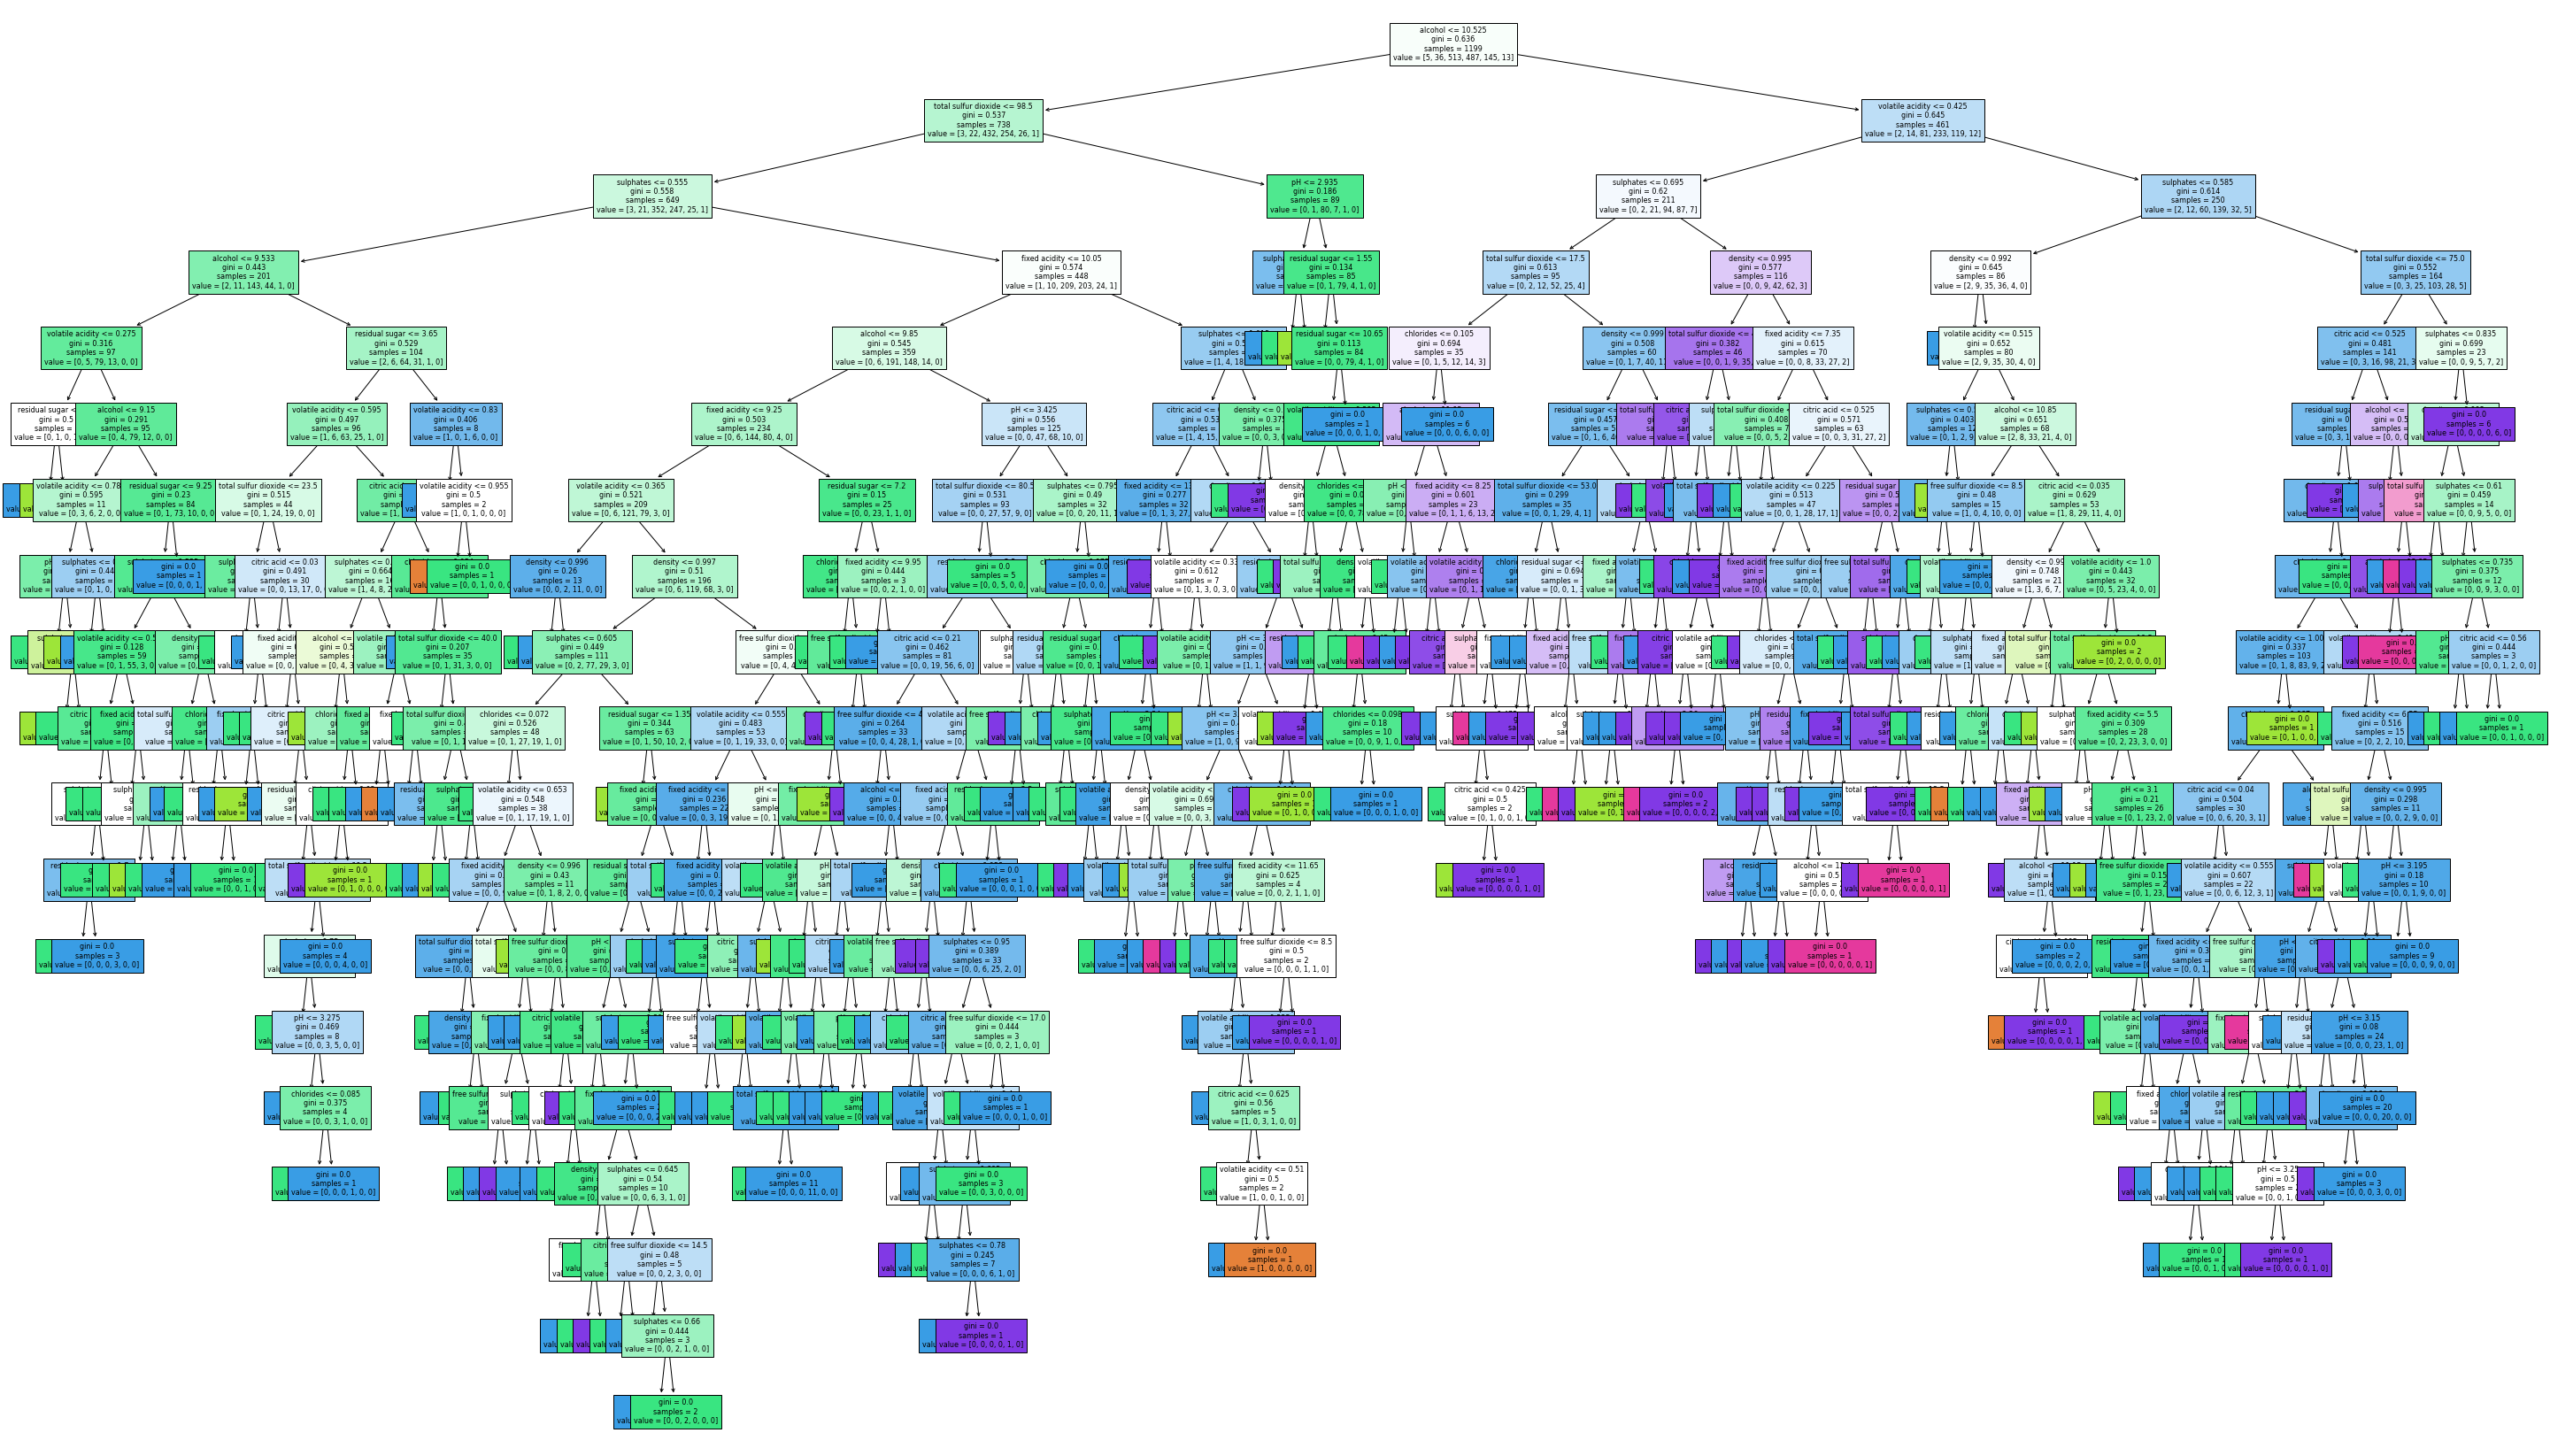

In [89]:
fig = plt.figure(figsize=(50,30))
plot_tree(model, feature_names=Feature, fontsize=8, filled=True, )

As it clearly showing that our decision tree model is overfitting the training data. But for the sake if learing we will proof that it is overfitting the data.

To find that our model is suffering from overfitting problem we have to find the 
accuracy of training data and testing data if there is huge difference then it is overfitting

In [34]:
# Accuracy of training data
y_pred_train = model.predict(x_train)
accuracy_training = accuracy_score(y_train, y_pred_train)
print(accuracy_training)

1.0


As expected we it will show 100% accuracy for training data

In [35]:
# Accuracy of testing data
y_pred_test = model.predict(x_test)
accuracy_testing = accuracy_score(y_test, y_pred_test)
print(accuracy_testing)

0.585


As you can see it is performing very poorly for testing data. Accuracy reduces 40% down.

To overcome Overfitting we can tune hyperparameters.
Lets see how????

In [51]:
# we will use GridSearch technique to find the best parameters for the model

grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

grid_search = GridSearchCV(estimator=model,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

[Text(166.2293363764045, 207.55636363636364, 'alcohol <= 10.525\nentropy = 1.676\nsamples = 1199\nvalue = [5, 36, 513, 487, 145, 13]'),
 Text(81.29009831460674, 187.7890909090909, 'sulphates <= 0.575\nentropy = 1.348\nsamples = 738\nvalue = [3, 22, 432, 254, 26, 1]'),
 Text(31.269943820224718, 168.0218181818182, 'sulphates <= 0.515\nentropy = 1.143\nsamples = 293\nvalue = [3, 13, 210, 65, 2, 0]'),
 Text(10.97191011235955, 148.25454545454545, 'citric acid <= 0.055\nentropy = 1.057\nsamples = 115\nvalue = [0, 10, 88, 16, 1, 0]'),
 Text(5.015730337078652, 128.48727272727274, 'volatile acidity <= 0.735\nentropy = 0.974\nsamples = 24\nvalue = [0, 5, 18, 0, 1, 0]'),
 Text(2.507865168539326, 108.72, 'residual sugar <= 1.3\nentropy = 0.31\nsamples = 18\nvalue = [0, 0, 17, 0, 1, 0]'),
 Text(1.253932584269663, 88.95272727272729, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0]'),
 Text(3.761797752808989, 88.95272727272729, 'entropy = 0.0\nsamples = 17\nvalue = [0, 0, 17, 0, 0, 0]'),
 Text

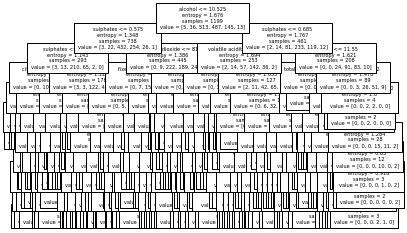

In [52]:
grid_search.fit(x_train,y_train)

In [53]:
best_parameters = grid_search.best_params_
print(best_parameters)

0.8865721434528774


In [55]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth =24, min_samples_leaf= 1, min_samples_split= 2, splitter ='random')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=24, splitter='random')

In [56]:
model.score(x_test,y_test)

0.6175

As you can observe our score is increased